## Module 2: Image Processing

In this notebook, I will explore different methods to transform input images into clearer, easier to analyze output images.


### Section 1: Introduction

In this section, I will cover topics including
1. Pixel Processing
2. Linear Shift-Invariant Systems and Convolutions
3. Linear Image Filters
4. Non-Linear Image Filters
5. Template Matching by Correlation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Pixel Processing**

Let $f$ be a function that represents an image with the value at $f(x, y)$ being the intensity value at the point (x, y). We can then define a transformation T s.t. $g(x,y) = T(f(x,y))$ where g is the function representing a new image. 

T can darken, lighten, and invert the image as well as decrease/increase the image's contrast or even grayscale the image.

[Tyler the creator](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fvariety.com%2Fwp-content%2Fuploads%2F2014%2F03%2Ftyler-the-creator1.jpg%3Fresize%3D450&f=1&nofb=1&ipt=59ec17da8aa227625ea538f95e54ba718c127af08eb272a258d002cf456b53d9&ipo=images) will be our muse today :)

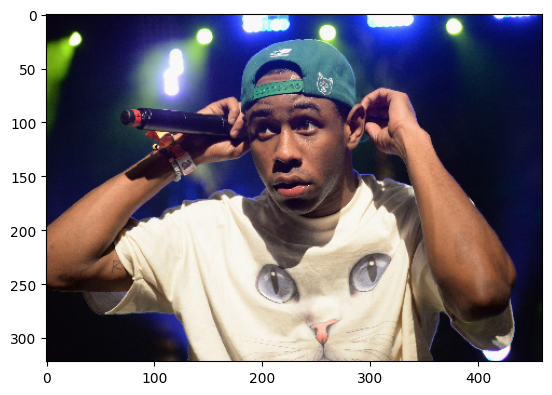

In [85]:
tyler = cv2.imread(rf'Data/tyler-the-creator.jpg')
tyler = cv2.resize(tyler, dsize =(0,0), fx=0.1, fy=0.1)
plt.imshow(cv2.cvtColor(tyler, cv2.COLOR_BGR2RGB))

In [86]:
mi, ma = np.min(np.subtract(np.int32(tyler),100)), np.max(tyler-100)
print(mi, ma)

-100 255


(322, 460, 3)


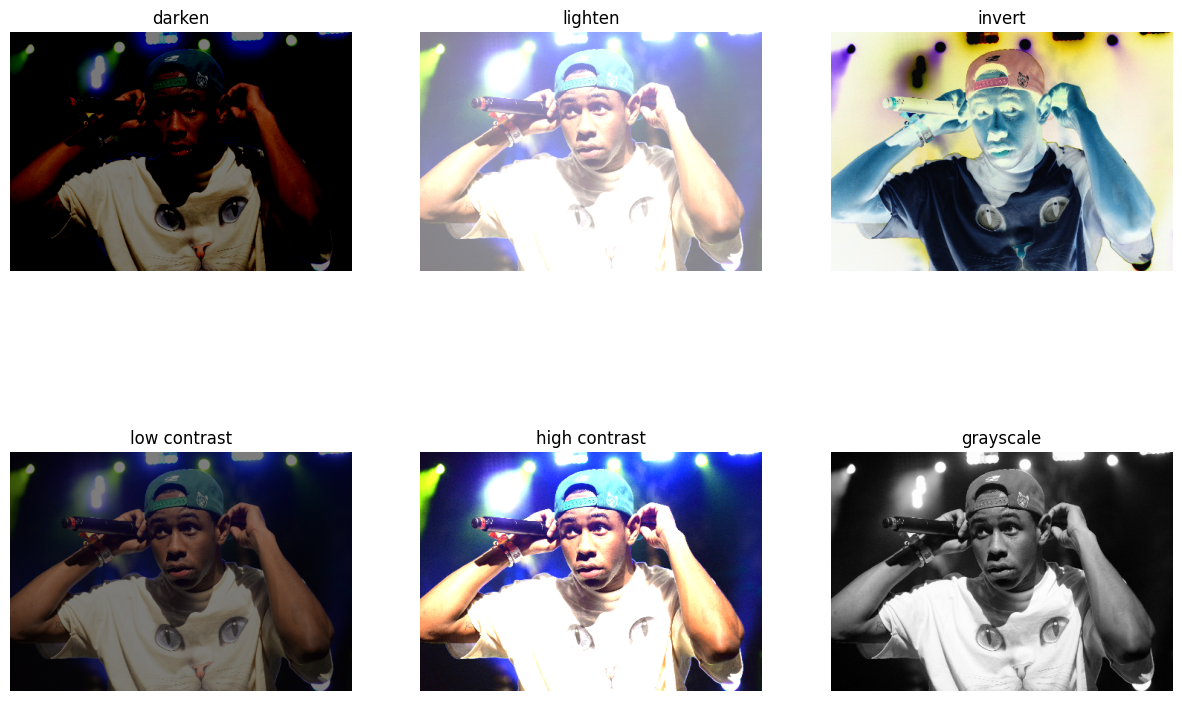

In [89]:
new_tyler = np.int32(cv2.cvtColor(tyler, cv2.COLOR_BGR2RGB))
modified_tylers = {
    'darken': np.clip(new_tyler - 128, 0, 255), # darken
    "lighten": np.clip(new_tyler + 128, 0, 255), # lighten
    'invert': 255 - new_tyler, # invert
    'low contrast': new_tyler // 2, # low contrast
    'high contrast': np.clip(new_tyler * 2, 0, 255), # high contrast
    'grayscale': (0.1 * tyler[...,0]) + (0.6 * tyler[...,1]) +(0.3 * tyler[...,2]) # grayscale
}
print(modified_tylers['darken'].shape)
fig, ax = plt.subplots(2,3, figsize=(15,10))
for i, (name, image) in enumerate(modified_tylers.items()):
    if i < 5:
        ax[i//3][i%3].imshow(image)
    else:
        ax[1][2].imshow(image, cmap='gray', label = name)
    ax[i//3][i%3].set_title(name)    
    ax[i//3][i%3].axis('off')

**Linear Shift-Invariant Systems (LSIS)**

First we'll look at how LSISs work on 1D signals as it can be abstracted later into more dimensions. An LSIS is a system that ensures 2 properties where $f(x) -> LSIS -> g(x)$:
1. Linearity
    - $f_1(x) \rightarrow LSIS \rightarrow g_1(x)$ and $f_1(x) \rightarrow LSIS \rightarrow g_1(x)$
    - $\implies \alpha f_1(x) + \Beta f_2(x) \rightarrow LSIS \rightarrow \alpha g_1(x) + \Beta g_2(x)$
2. Shift Invariance
    - $f(x) \rightarrow LSIS \rightarrow g(x) \implies f(x - a) \rightarrow LSIS \rightarrow g(x - a)$


An ideal lens is an example of an LSIS!

----

**Convolutions**

We define convolutions of two functions f(x) and h(x) as $g(x) = f(x) \ast h(x) = \int_{-\infty}^{\infty}f(\tau)h(x-\tau)d\tau$. To visualize this better, we'll look at different functions and the resulting transformations and convolutions they go through.



In [134]:
# A group of functions for showing convolutions on
def quad(x):
    return -(x**2)

def rect(x):
    return np.array([0 if i < 0 or i > 1 else 1 for i in x])

def triangle(x_arr):
    output = np.zeros_like(x_arr)
    for i, x in enumerate(x_arr):
        if x < 0 or x > 2:
            output[i] = 0
        elif x <= 1:
            output[i] = x
        else:
            output[i] = 2 - x

    return output
    
def sin_wave(x, amp):
    return amp * np.sin(x)

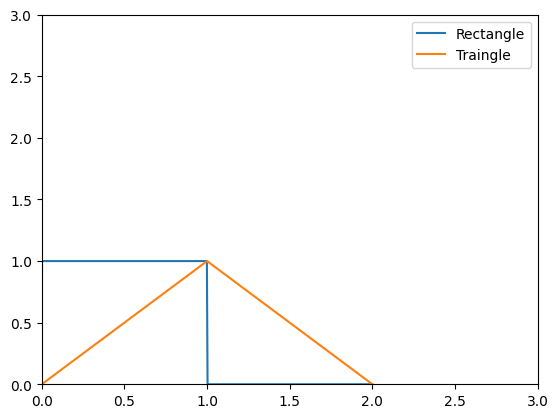

In [153]:
x1 = np.linspace(-2,2,1000)
y1 = rect(x1)

x2 = np.linspace(-2,2,1000)
y2 = triangle(x2)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='Rectangle')
ax.plot(x2, y2, label='Traingle')
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.legend()
plt.show()

In [155]:
print(np.max(np.convolve(y2, y1, mode='same'))/250)

0.74974974974975


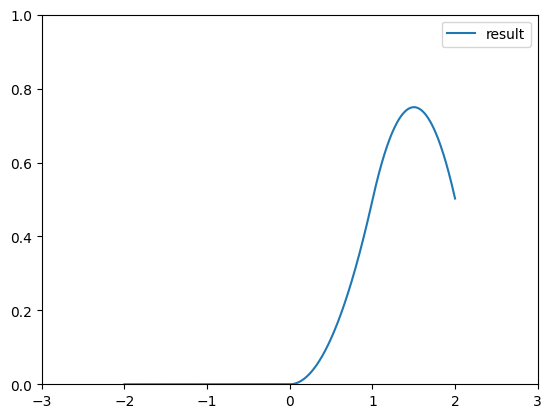

In [156]:
new_x =np.linspace(-2, 2, 1000)
conv = np.convolve(y1, y2, mode='same')/250
fig, ax = plt.subplots()
ax.plot(new_x, conv, label='result')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1)
plt.legend()
plt.show()